In [40]:
import pandas as pd
data = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# escojo solo 2 features
X1=data['sepal length']
X2=data['petal length']
Y=data['class']

Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [42]:
import numpy as np
np.unique(Y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
# mascaras. Escojo solo 2 clases
class_0 = Y =='Iris-setosa'
class_1 = Y =='Iris-versicolor'

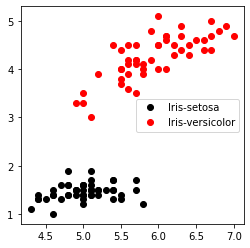

In [44]:
# grafico
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
plt.plot(X1[class_0], X2[class_0], 'o', c='black', label='Iris-setosa')
plt.plot(X1[class_1], X2[class_1], 'o', c='red', label='Iris-versicolor')
plt.legend()
plt.show()

In [45]:
# funcion de activacion: la funcion sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

# queremos encontrar esta funcion
def y(x):
  return -(b + w_1*x)/w_2

In [46]:
# convertir a 0,1 las clases
Y[Y=='Iris-setosa'] = 0
Y[Y=='Iris-versicolor'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
Y = Y.drop(columns=['Iris-virginica'])
Y

0                   0
1                   0
2                   0
3                   0
4                   0
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

Epoch [1/15], bias: 25.0, w1: 165.64999999999995, w2: 140.45


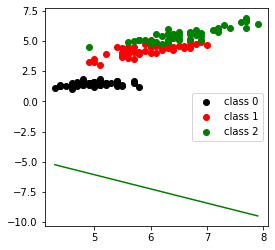

Epoch [2/15], bias: 25.0, w1: 205.19999999999987, w2: 242.6500000000001


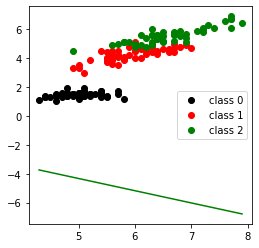

Epoch [3/15], bias: 25.0, w1: 244.74999999999974, w2: 344.85000000000036


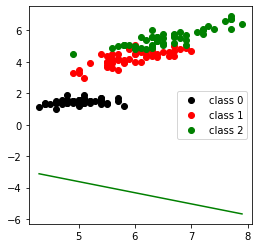

Epoch [4/15], bias: 25.0, w1: 284.29999999999967, w2: 447.0500000000005


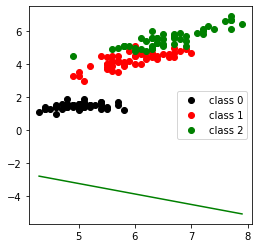

Epoch [5/15], bias: 25.0, w1: 323.84999999999957, w2: 549.2500000000006


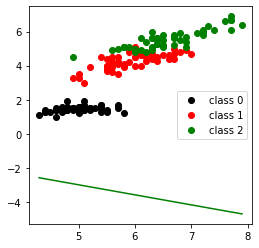

Epoch [6/15], bias: 25.0, w1: 363.3999999999997, w2: 651.4499999999999


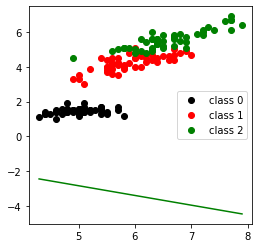

Epoch [7/15], bias: 25.0, w1: 402.9499999999997, w2: 753.6499999999993


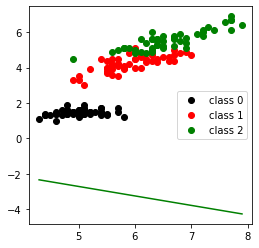

Epoch [8/15], bias: 25.0, w1: 442.4999999999997, w2: 855.8499999999987


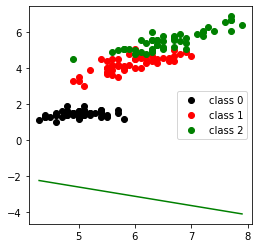

Epoch [9/15], bias: 25.0, w1: 482.0499999999997, w2: 958.049999999998


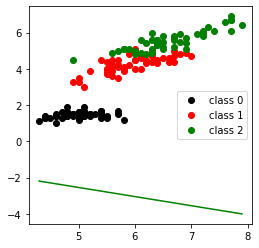

Epoch [10/15], bias: 25.0, w1: 521.5999999999998, w2: 1060.2499999999973


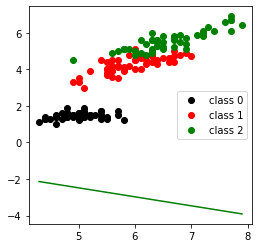

Epoch [11/15], bias: 25.0, w1: 561.15, w2: 1162.4499999999966


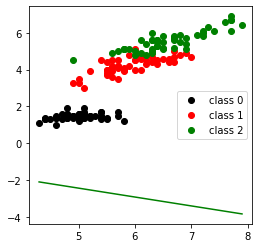

Epoch [12/15], bias: 25.0, w1: 600.7000000000003, w2: 1264.649999999996


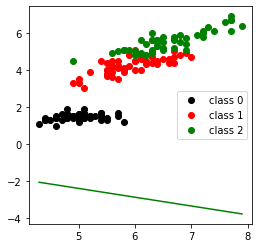

Epoch [13/15], bias: 25.0, w1: 640.2500000000007, w2: 1366.8499999999954


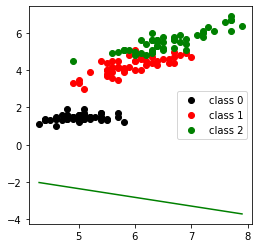

Epoch [14/15], bias: 25.0, w1: 679.8000000000011, w2: 1469.0499999999947


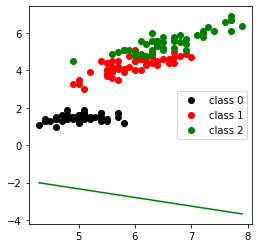

Epoch [15/15], bias: 25.0, w1: 719.3500000000015, w2: 1571.249999999994


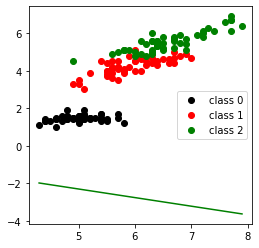

In [37]:
# perceptron

# inicializo pesos y el bias b en 0
b = 0
w_1 = 0
w_2 = 0 

# inicializo numero de epocas y tasa de aprendizaje
n_epochs = 15
n = 0.5   # rata de aprendizaje

# entrenamiento el perceptron
for epoch in range(n_epochs):    # cada ciclo es una epoca
  for i,j,k in zip(X1,X2,Y):
    z = i*w_1 + j*w_2 + b   # defino funcion de suma: componente lineal
    sig_z = act(z)      # funcion de activacion: componente no lineal

    out = 1 if sig_z >= 0.5 else 0

    # defino la funcion de error
    error = k - out   

    #actualizo los pesos y el bias b
    b = b + n*error
    w_1 = w_1 + n*error*i
    w_2 = w_2 + n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1, n_epochs, b, w_1, w_2))

  # realizo graficas por cada epoca
  fig = plt.figure(figsize=(4,4))
  plt.plot(X1[class_0], X2[class_0], 'o', c='black', label='class 0')
  plt.plot(X1[class_1], X2[class_1], 'o', c='red', label='class 1')
  plt.plot(X1[class_2], X2[class_2], 'o', c='green', label='class 2')
  plt.plot(np.sort(X1), y(np.sort(X1)), 'g-')
  plt.legend()
  plt.show()